In [1]:
!pip install ydata_profiling

  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/666.3 kB ? eta -:--:--
   ---------------------------------------- 666.3/666.3 kB 5.2 MB/s eta 0:00:00
Using cached pydantic-2.10.6-py3-none-any.whl (431 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------ --- 1.8/2.0 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.

In [10]:
!pip install ipywidgets

  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ydata_profiling import ProfileReport
from operator import itemgetter

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, Bidirectional, BatchNormalization, Input, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

c:\Users\andik\anaconda3\envs\AndikaTF\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [34]:
# data asli diambil dari https://www.kaggle.com/bittlingmayer/amazonreviews

df = pd.read_csv('Seasonal_activity_data.csv')
df

,Text,Review-Activity,Season
0,Don't Buy!: Beware. . .I have washed and greas...,REVIEW,NOT APPLICABLE
1,Ice Skating Sledding Shopping,ACTIVITY,WINTER
2,Enjoy the changing colors of leaves Weather ...,ACTIVITY,FALL
3,Can't recommend: I have two of these (received...,REVIEW,NOT APPLICABLE
4,Do not buy unless you will connect it though t...,REVIEW,NOT APPLICABLE
...,...,...,...
9995,"Pumpkin patches, hayrides, and haunted house a...",ACTIVITY,FALL
9996,"King Diamond's ""HOUSE OF GOD"": King Diamond on...",REVIEW,NOT APPLICABLE
9997,Mini-Jack Woes: Like another person - I got th...,REVIEW,NOT APPLICABLE
9998,being outdoors camping grilling,ACTIVITY,SUMMER


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             9999 non-null   object
 1   Review-Activity  10000 non-null  object
 2   Season           10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [36]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             9999 non-null   object
 1   Review-Activity  9999 non-null   object
 2   Season           9999 non-null   object
dtypes: object(3)
memory usage: 312.5+ KB


In [37]:
df['Text'] = df['Text'].astype(str)

C:\Users\andik\AppData\Local\Temp\ipykernel_19896\3500421930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].astype(str)


In [8]:
df_profiling = df.drop(columns=['Text'])
profile_df = ProfileReport(df_profiling, title='Seasonal Activity Data Report')
profile_df.to_file('report_df.html')

c:\Users\andik\anaconda3\envs\AndikaTF\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 120.20it/s]


In [11]:
profile_df

In [38]:
# Kita hanya akan memprediksi musim berdasarkan teks yang ada
df.drop(columns=['Review-Activity'], inplace = True)

C:\Users\andik\AppData\Local\Temp\ipykernel_19896\3525026742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Review-Activity'], inplace = True)


# Data Cleaning

In [39]:
stop_words = set(stopwords.words('english')) # karena teksnya berupa bahasa inggris

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df[df.Season == "FALL"].Text)
fall_words = sorted(tokenizer.word_counts.items(), key=itemgetter(1), reverse=True)
fall_words = [(word, count) for word, count in fall_words if word not in stop_words]
print("Fall Words\n", fall_words[:25]) # kata-kata yang identik dengan musim gugur

tokenizer.fit_on_texts(df[df.Season == "SUMMER"].Text)
summer_words = sorted(tokenizer.word_counts.items(), key=itemgetter(1), reverse=True)
summer_words = [(word, count) for word, count in summer_words if word not in stop_words]
print("Summer Words\n", summer_words[:25]) # kata-kata yang identik dengan musim panas

tokenizer.fit_on_texts(df[df.Season == "WINTER"].Text)
winter_words = sorted(tokenizer.word_counts.items(), key=itemgetter(1), reverse=True)
winter_words = [(word, count)  for word, count in winter_words if word not in stop_words]
print("Winter Words\n", winter_words[:25]) # kata-kata yang identik dengan musim dingin

Fall Words
 [('leaves', 390), ('football', 354), ('pumpkin', 349), ('watching', 305), ('halloween', 281), ('fall', 267), ('thanksgiving', 264), ('walking', 216), ('picking', 205), ('going', 194), ('hiking', 187), ('apple', 181), ('eating', 131), ('weather', 117), ('carving', 117), ('family', 110), ('pumpkins', 107), ('shopping', 106), ('drinking', 106), ('movies', 101), ('baking', 99), ('colors', 97), ('decorating', 95), ('cooking', 93), ('patch', 91)]
Summer Words
 [('going', 496), ('swimming', 447), ('leaves', 390), ('hiking', 376), ('football', 360), ('pumpkin', 349), ('watching', 343), ('beach', 315), ('walking', 302), ('halloween', 281), ('fall', 267), ('thanksgiving', 264), ('picking', 209), ('family', 198), ('camping', 190), ('apple', 182), ('fishing', 174), ('eating', 170), ('movies', 137), ('weather', 135), ('shopping', 132), ('traveling', 129), ('drinking', 127), ('outside', 127), ('reading', 123)]
Winter Words
 [('watching', 754), ('snow', 647), ('going', 612), ('hiking', 48

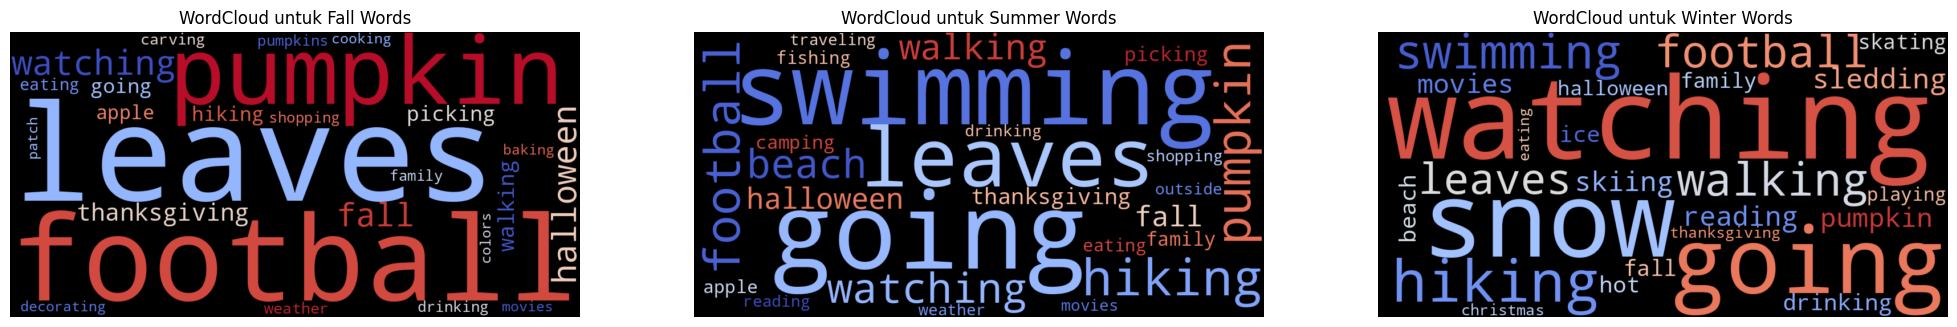

In [40]:
# Mari kita cek kata-kata yang sering muncul pada dataset

wc = WordCloud(max_words=5000,
               min_font_size=10,
               height=500,
               width=1000,
               colormap='coolwarm_r',
               repeat=False)
plt.figure(figsize=(25,15))

plt.subplot(3,3,1)
wc.generate_from_frequencies(frequencies=dict(fall_words[:25]))
plt.imshow(wc, interpolation="bilinear")
plt.title("WordCloud untuk Fall Words")
plt.axis("off")

plt.subplot(3,3,2)
wc.generate_from_frequencies(frequencies=dict(summer_words[:25]))
plt.imshow(wc, interpolation="bilinear")
plt.title("WordCloud untuk Summer Words")
plt.axis("off")

plt.subplot(3,3,3)
wc.generate_from_frequencies(frequencies=dict(winter_words[:25]))
plt.imshow(wc, interpolation="bilinear")
plt.title("WordCloud untuk Winter Words")
plt.axis("off")

plt.show()

In [41]:
# Melakukan label encoder
label_encoder = LabelEncoder()
label_encoder.fit(df["Season"].values)
num_season_classes = len(label_encoder.classes_)
df["Season_Label"] = label_encoder.transform(df["Season"].values)

C:\Users\andik\AppData\Local\Temp\ipykernel_19896\2723896739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Season_Label"] = label_encoder.transform(df["Season"].values)


In [42]:
# PS = PorterStemmer()
# df["Text"] = df["Text"].apply(lambda x: " ".join([PS.stem(re.sub(r'[^\w\d]', "", word))
#                                                   for word in x.lower().split() if word not in stop_words]))

# Train Test Split + Tokenization

In [43]:
df

,Text,Season,Season_Label
0,Don't Buy!: Beware. . .I have washed and greas...,NOT APPLICABLE,1
1,Ice Skating Sledding Shopping,WINTER,3
2,Enjoy the changing colors of leaves Weather ...,FALL,0
3,Can't recommend: I have two of these (received...,NOT APPLICABLE,1
4,Do not buy unless you will connect it though t...,NOT APPLICABLE,1
...,...,...,...
9995,"Pumpkin patches, hayrides, and haunted house a...",FALL,0
9996,"King Diamond's ""HOUSE OF GOD"": King Diamond on...",NOT APPLICABLE,1
9997,Mini-Jack Woes: Like another person - I got th...,NOT APPLICABLE,1
9998,being outdoors camping grilling,SUMMER,2


In [44]:
X = df['Text']
y = df['Season_Label'].values

In [45]:
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 23676


In [46]:
PS = PorterStemmer()
X = X.apply(lambda x: " ".join([PS.stem(re.sub(r'[^\w\d]', "", word))
                                                  for word in x.lower().split() if word not in stop_words]))

In [47]:
# Kita split data untuk validasi adalah 20% dari keseluruhan data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [48]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 7999 entries, 9254 to 7271
Series name: Text
Non-Null Count  Dtype 
--------------  ----- 
7999 non-null   object
dtypes: object(1)
memory usage: 125.0+ KB


In [49]:
X_valid.info()

<class 'pandas.core.series.Series'>
Index: 2000 entries, 5345 to 8872
Series name: Text
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [50]:
max_length = 120
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding="post", truncating='post')
X_valid = pad_sequences(tokenizer.texts_to_sequences(X_valid), maxlen=max_length, padding="post", truncating='post')

# Build Model

In [51]:
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(vocab_size+1, 128))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_season_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 128)          3030656   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 120, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 120, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                      

In [52]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [53]:
checkpoint_path = 'training_model/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

lr_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience=3,
                                            factor=0.5,
                                            min_lr = 1e-6,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 15,restore_best_weights=True,verbose=1)

In [54]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size = 64,
                    callbacks=[cp_callback, lr_reduction, early_stoping],
                    epochs=50)

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 0.6914 - acc: 0.6876
Epoch 1: saving model to training_model\cp.ckpt
125/125 [==============================] - 17s 83ms/step - loss: 0.6914 - acc: 0.6876 - val_loss: 0.4621 - val_acc: 0.8045 - lr: 0.0010
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 0.3564 - acc: 0.8617
Epoch 2: saving model to training_model\cp.ckpt
125/125 [==============================] - 9s 71ms/step - loss: 0.3564 - acc: 0.8617 - val_loss: 0.2926 - val_acc: 0.8950 - lr: 0.0010
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.2651 - acc: 0.8961
Epoch 3: saving model to training_model\cp.ckpt
125/125 [==============================] - 9s 71ms/step - loss: 0.2651 - acc: 0.8961 - val_loss: 0.2650 - val_acc: 0.8945 - lr: 0.0010
Epoch 4/50
125/125 [==============================] - ETA: 0s - loss: 0.2374 - acc: 0.9075
Epoch 4: saving model to training_model\cp.ckpt
125/125 [=============================

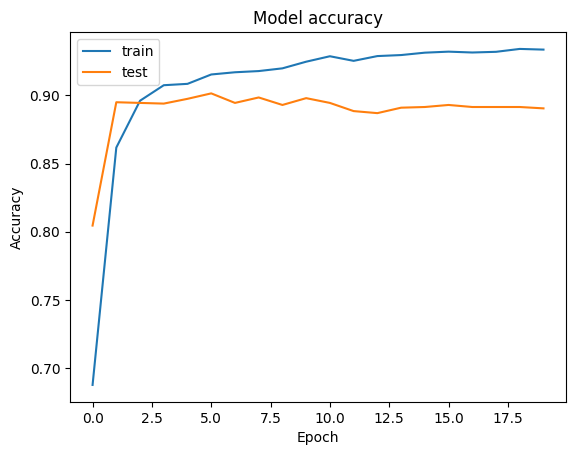

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 2s 28ms/step - loss: 0.2538 - acc: 0.8975


[0.2538453936576843, 0.8974999785423279]

# Confusion matrix + classification report

In [57]:
y_pred = model.predict(X_valid)

63/63 [==============================] - 3s 29ms/step


In [58]:
y_pred = pd.DataFrame(y_pred)
y_pred_list = []

for i in range(len(y_pred)):
    y_pred_list.append(y_pred.columns[np.argmax(y_pred.iloc[i])])

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       429
           1       1.00      0.99      1.00       870
           2       0.88      0.77      0.82       243
           3       0.88      0.81      0.84       458

    accuracy                           0.90      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000



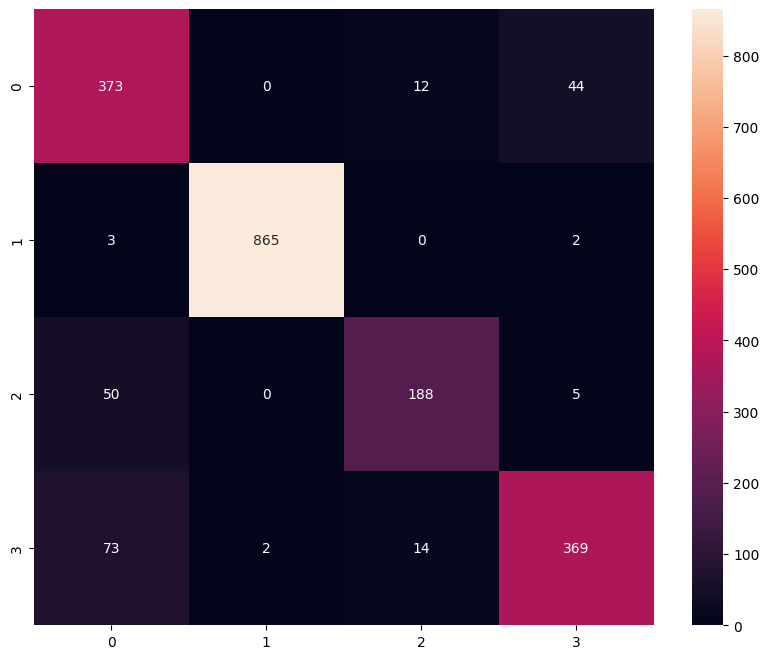

In [59]:
print(classification_report(y_valid, y_pred_list))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_valid, y_pred_list), annot=True, fmt='')
plt.show()

# Sekian Terima Kasih

### Created by: Andika Rahman Teja